# Uber Price Predicition 

# Team Members:

    1.Viveksingh chauhan
    2.Tejas kolhe

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

### Import Datasets

In [2]:
uber_data=pd.read_csv("cab_rides.csv")
weather_data=pd.read_csv("weather.csv")

In [3]:
uber_data.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [4]:
weather_data.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


## Transformation of data

In [5]:
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  int64  
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


In [6]:
uber_data.shape

(693071, 10)

In [7]:
uber_data.isnull().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

In [8]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        6276 non-null   float64
 1   location    6276 non-null   object 
 2   clouds      6276 non-null   float64
 3   pressure    6276 non-null   float64
 4   rain        894 non-null    float64
 5   time_stamp  6276 non-null   int64  
 6   humidity    6276 non-null   float64
 7   wind        6276 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.4+ KB


In [9]:
weather_data.shape

(6276, 8)

In [10]:
weather_data.isnull().sum()

temp             0
location         0
clouds           0
pressure         0
rain          5382
time_stamp       0
humidity         0
wind             0
dtype: int64

In [11]:
## Removing rows for missing price

uber_data.dropna(subset=['price'],inplace=True)

uber_data.isnull().sum()


distance            0
cab_type            0
time_stamp          0
destination         0
source              0
price               0
surge_multiplier    0
id                  0
product_id          0
name                0
dtype: int64

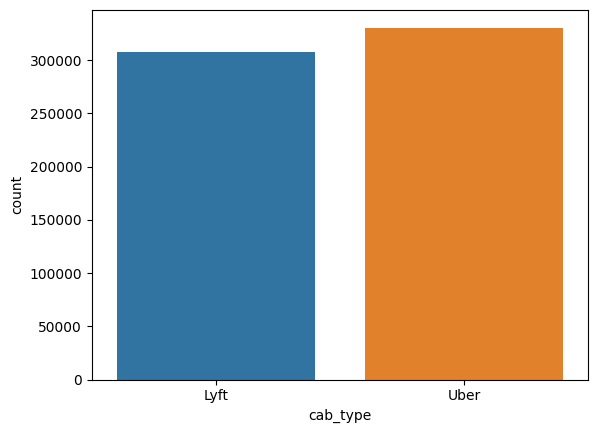

In [12]:
ax=sns.countplot(data=uber_data,x='cab_type')

###### Our analysis and prediction is on Uber Cars only therefore we select only uber and drop rest.

In [13]:
#uber_data.drop(uber_data['cab_type']=='Lyft',axis=0)
#taking lot of time to fetch

In [14]:
uber_data = uber_data.loc[uber_data['cab_type'] == 'Uber']

In [15]:
uber_data

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
12,1.11,Uber,1543615981179,West End,North End,12.0,1.0,009e9c53-074d-43cf-aef2-0fbc7a47ed3d,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
13,1.11,Uber,1544698211014,West End,North End,16.0,1.0,23f145da-f0c1-4d1f-a184-496bc003a7db,6c84fd89-3f11-4782-9b50-97c468b19529,Black
14,1.11,Uber,1544728503935,West End,North End,7.5,1.0,357559cb-8c58-4278-a41a-e33b2e0997a3,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
15,1.11,Uber,1545004511430,West End,North End,7.5,1.0,50ef1165-9d23-416c-a65c-18906207b295,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV
16,1.11,Uber,1544748007961,West End,North End,26.0,1.0,91c4861c-1780-42b0-bca1-bbd64a422cc3,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV
...,...,...,...,...,...,...,...,...,...,...
693065,1.00,Uber,1543708385534,North End,West End,9.5,1.0,353e6566-b272-479e-a9c6-98bd6cb23f25,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV
693066,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
693067,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
693069,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


#### We drop rain column as there was no rain entire year. therefore it has missing values. We remove it as to avoid errors in prediction.

In [16]:
weather_data['rain'].fillna(0,inplace=True)

In [17]:
weather_data

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49
...,...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,0.0000,1543819974,0.96,1.52
6272,44.85,Northeastern University,0.88,1000.71,0.0000,1543819974,0.96,1.54
6273,44.82,South Station,0.89,1000.70,0.0000,1543819974,0.96,1.54
6274,44.78,Theatre District,0.89,1000.70,0.0000,1543819974,0.96,1.54


#### Convering timeStamp to Date time format for better analysis and modelling.

In [18]:
from datetime import datetime, date
uber_data['datetime']=pd.to_datetime(uber_data['time_stamp'],unit='ms', infer_datetime_format=True)
weather_data['date_time']=pd.to_datetime(weather_data['time_stamp'],unit='s',infer_datetime_format=True)

In [19]:
uber_data['Udate']=uber_data.datetime.dt.date

In [20]:
weather_data['Wdate']=weather_data.date_time.dt.date

In [21]:
uber_data.describe()

,distance,time_stamp,price,surge_multiplier
count,330568.000000,3.305680e+05,330568.000000,330568.0
mean,2.191386,1.544046e+12,15.795343,1.0
std,1.178973,6.897122e+08,8.560300,0.0
min,0.020000,1.543204e+12,4.500000,1.0
25%,1.300000,1.543444e+12,9.000000,1.0
50%,2.170000,1.543737e+12,12.500000,1.0
75%,2.840000,1.544828e+12,21.500000,1.0
max,7.860000,1.545161e+12,89.500000,1.0


In [22]:
weather_data.describe()

,temp,clouds,pressure,rain,time_stamp,humidity,wind
count,6276.000000,6276.000000,6276.000000,6276.000000,6.276000e+03,6276.000000,6276.000000
mean,39.090475,0.677777,1008.445209,0.008212,1.543857e+09,0.763985,6.802812
std,6.022055,0.314284,12.870775,0.043021,6.659340e+05,0.127340,3.633466
min,19.620000,0.000000,988.250000,0.000000,1.543204e+09,0.450000,0.290000
25%,36.077500,0.440000,997.747500,0.000000,1.543387e+09,0.670000,3.517500
50%,40.130000,0.780000,1007.660000,0.000000,1.543514e+09,0.760000,6.570000
75%,42.832500,0.970000,1018.480000,0.000000,1.544691e+09,0.890000,9.920000
max,55.410000,1.000000,1035.120000,0.780700,1.545159e+09,0.990000,18.180000


In [23]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   temp        6276 non-null   float64       
 1   location    6276 non-null   object        
 2   clouds      6276 non-null   float64       
 3   pressure    6276 non-null   float64       
 4   rain        6276 non-null   float64       
 5   time_stamp  6276 non-null   int64         
 6   humidity    6276 non-null   float64       
 7   wind        6276 non-null   float64       
 8   date_time   6276 non-null   datetime64[ns]
 9   Wdate       6276 non-null   object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 490.4+ KB


In [24]:
weather_data.size

62760

In [25]:
weather_data.loc[0:50,]

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind,date_time,Wdate
0,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25,2018-12-16 23:45:01,2018-12-16
1,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32,2018-12-16 23:45:01,2018-12-16
2,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07,2018-12-16 23:45:01,2018-12-16
3,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09,2018-12-16 23:45:01,2018-12-16
4,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49,2018-12-16 23:45:01,2018-12-16
5,42.34,Haymarket Square,1.00,1012.15,0.2068,1545003901,0.77,11.49,2018-12-16 23:45:01,2018-12-16
6,42.36,North End,1.00,1012.15,0.2088,1545003901,0.77,11.46,2018-12-16 23:45:01,2018-12-16
7,42.21,North Station,1.00,1012.16,0.2069,1545003901,0.77,11.37,2018-12-16 23:45:01,2018-12-16
8,42.07,Northeastern University,1.00,1012.12,0.1020,1545003901,0.78,11.28,2018-12-16 23:45:01,2018-12-16
9,43.05,South Station,1.00,1012.12,0.1547,1545003901,0.75,11.58,2018-12-16 23:45:01,2018-12-16


# Merging two Datasets

In [26]:
uber_data_Temp=uber_data.sample(n = 25000, random_state = 12345) # taking random samples
##concatenating two datasets.
UberWeather = pd.merge(uber_data_Temp, weather_data, how='inner', left_on=['Udate','destination'], right_on=['Wdate','location'])    

In [27]:
UberWeather.shape

(966161, 22)

In [28]:
UberWeather.isnull().sum()

distance            0
cab_type            0
time_stamp_x        0
destination         0
source              0
price               0
surge_multiplier    0
id                  0
product_id          0
name                0
datetime            0
Udate               0
temp                0
location            0
clouds              0
pressure            0
rain                0
time_stamp_y        0
humidity            0
wind                0
date_time           0
Wdate               0
dtype: int64

# Handling Outliers 

In [29]:
from scipy.stats import iqr
uberdistance_iqr=iqr(UberWeather['distance'])

In [30]:
uberdistance_iqr

1.5599999999999998

In [31]:
UberWeather['distance'].describe()

count    966161.000000
mean          2.200283
std           1.182272
min           0.020000
25%           1.300000
50%           2.190000
75%           2.860000
max           7.500000
Name: distance, dtype: float64

In [32]:
q3 = 2.860000
q1 = 1.300000
iqr = q3 - q1
iqr

1.5599999999999998

In [33]:
u_limit_for_outlier = q3 + 1.5*iqr
l_limit_for_outlier = q1 - 1.5*iqr
print(u_limit_for_outlier,l_limit_for_outlier)

5.199999999999999 -1.0399999999999998


[]

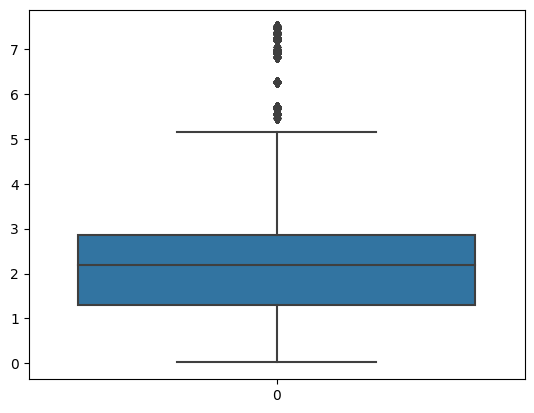

In [34]:
sns.boxplot(UberWeather['distance'])
plt.plot()

In [35]:
UberWeather.drop(UberWeather[UberWeather['distance']>5.1].index,inplace=True)

In [36]:
UberWeather.shape

(947191, 22)

[]

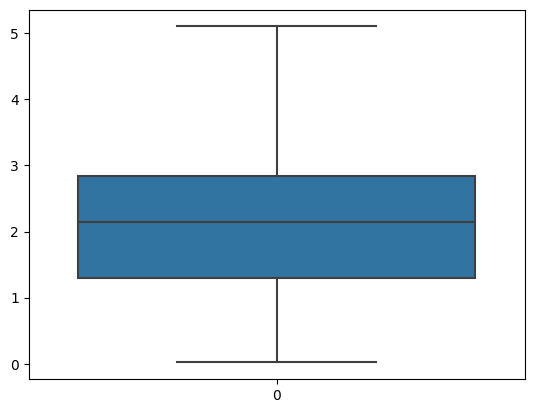

In [37]:
sns.boxplot(UberWeather['distance'])
plt.plot()

# Feature Engineering

In [38]:
# created new commputed columns Wweek(week days) and Whour(hours) in order predict price according to rising demand
UberWeather['Wweek']=UberWeather.date_time.dt.day_of_week
UberWeather['Whour']=UberWeather.date_time.dt.hour

In [39]:
UberWeather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 947191 entries, 0 to 966158
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   distance          947191 non-null  float64       
 1   cab_type          947191 non-null  object        
 2   time_stamp_x      947191 non-null  int64         
 3   destination       947191 non-null  object        
 4   source            947191 non-null  object        
 5   price             947191 non-null  float64       
 6   surge_multiplier  947191 non-null  float64       
 7   id                947191 non-null  object        
 8   product_id        947191 non-null  object        
 9   name              947191 non-null  object        
 10  datetime          947191 non-null  datetime64[ns]
 11  Udate             947191 non-null  object        
 12  temp              947191 non-null  float64       
 13  location          947191 non-null  object        
 14  clou

In [40]:
UberWeather.surge_multiplier = pd.to_numeric(UberWeather.surge_multiplier)
#to_numeric(a)

In [41]:
UberWeather

,distance,cab_type,time_stamp_x,destination,source,price,surge_multiplier,id,product_id,name,...,clouds,pressure,rain,time_stamp_y,humidity,wind,date_time,Wdate,Wweek,Whour
0,0.55,Uber,1543896180749,South Station,Theatre District,27.5,1.0,e0369d75-66a0-4b92-8cb6-877c0fe831b7,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,0.04,1003.20,0.0,1543888374,0.60,7.75,2018-12-04 01:52:54,2018-12-04,1,1
1,0.55,Uber,1543896180749,South Station,Theatre District,27.5,1.0,e0369d75-66a0-4b92-8cb6-877c0fe831b7,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,0.25,1003.17,0.0,1543891974,0.62,8.44,2018-12-04 02:52:54,2018-12-04,1,2
2,0.55,Uber,1543896180749,South Station,Theatre District,27.5,1.0,e0369d75-66a0-4b92-8cb6-877c0fe831b7,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,0.56,1004.45,0.0,1543902774,0.64,8.21,2018-12-04 05:52:54,2018-12-04,1,5
3,0.55,Uber,1543896180749,South Station,Theatre District,27.5,1.0,e0369d75-66a0-4b92-8cb6-877c0fe831b7,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,0.53,1003.15,0.0,1543895574,0.62,7.36,2018-12-04 03:52:54,2018-12-04,1,3
4,0.55,Uber,1543896180749,South Station,Theatre District,27.5,1.0,e0369d75-66a0-4b92-8cb6-877c0fe831b7,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,0.52,1003.93,0.0,1543899174,0.63,8.05,2018-12-04 04:52:54,2018-12-04,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966152,3.22,Uber,1544399592411,North Station,Northeastern University,36.0,1.0,96f05779-4dc6-49db-b265-f5ab77257bf1,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,0.19,1022.80,0.0,1544396784,0.56,5.56,2018-12-09 23:06:24,2018-12-09,6,23
966155,2.62,Uber,1544397207574,Boston University,Theatre District,21.5,1.0,653c159a-de4b-4e1a-b616-8b990801abad,6c84fd89-3f11-4782-9b50-97c468b19529,Black,...,0.21,1022.81,0.0,1544396903,0.57,5.44,2018-12-09 23:08:23,2018-12-09,6,23
966156,2.62,Uber,1544397207574,Boston University,Theatre District,21.5,1.0,653c159a-de4b-4e1a-b616-8b990801abad,6c84fd89-3f11-4782-9b50-97c468b19529,Black,...,0.21,1022.82,0.0,1544396784,0.56,5.42,2018-12-09 23:06:24,2018-12-09,6,23
966157,1.39,Uber,1544399605107,Boston University,Back Bay,15.0,1.0,548cba6c-8f76-4eb8-8e4a-4a26e128f5ed,6c84fd89-3f11-4782-9b50-97c468b19529,Black,...,0.21,1022.81,0.0,1544396903,0.57,5.44,2018-12-09 23:08:23,2018-12-09,6,23


In [42]:
UberWeather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 947191 entries, 0 to 966158
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   distance          947191 non-null  float64       
 1   cab_type          947191 non-null  object        
 2   time_stamp_x      947191 non-null  int64         
 3   destination       947191 non-null  object        
 4   source            947191 non-null  object        
 5   price             947191 non-null  float64       
 6   surge_multiplier  947191 non-null  float64       
 7   id                947191 non-null  object        
 8   product_id        947191 non-null  object        
 9   name              947191 non-null  object        
 10  datetime          947191 non-null  datetime64[ns]
 11  Udate             947191 non-null  object        
 12  temp              947191 non-null  float64       
 13  location          947191 non-null  object        
 14  clou

<Axes: >

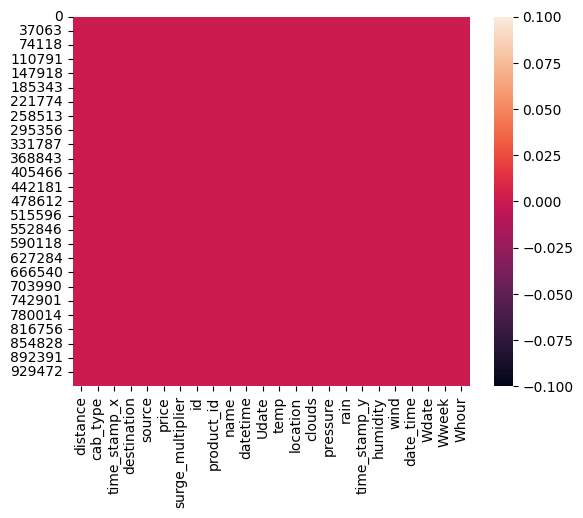

In [46]:
sns.heatmap(UberWeather.isnull())

In [47]:
UberWeather.isnull().sum()

distance            0
cab_type            0
time_stamp_x        0
destination         0
source              0
price               0
surge_multiplier    0
id                  0
product_id          0
name                0
datetime            0
Udate               0
temp                0
location            0
clouds              0
pressure            0
rain                0
time_stamp_y        0
humidity            0
wind                0
date_time           0
Wdate               0
Wweek               0
Whour               0
dtype: int64

In [48]:
UberWeather.fillna(0,inplace=True)

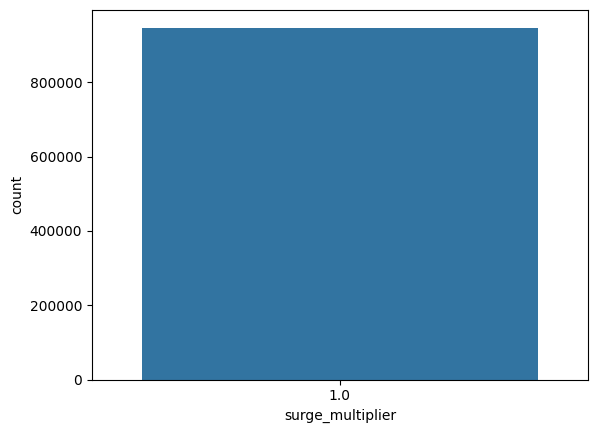

In [49]:
ax = sns.countplot(data=UberWeather, x='surge_multiplier')

In [50]:
UberWeather.surge_multiplier[UberWeather.surge_multiplier==1.0].sum()

947191.0

In [51]:
UberWeather.surge_multiplier

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
966152    1.0
966155    1.0
966156    1.0
966157    1.0
966158    1.0
Name: surge_multiplier, Length: 947191, dtype: float64

In [52]:
UberWeather.columns

Index(['distance', 'cab_type', 'time_stamp_x', 'destination', 'source',
       'price', 'surge_multiplier', 'id', 'product_id', 'name', 'datetime',
       'Udate', 'temp', 'location', 'clouds', 'pressure', 'rain',
       'time_stamp_y', 'humidity', 'wind', 'date_time', 'Wdate', 'Wweek',
       'Whour'],
      dtype='object')

In [53]:
UberWeather.groupby('cab_type').count()

,distance,time_stamp_x,destination,source,price,surge_multiplier,id,product_id,name,datetime,...,clouds,pressure,rain,time_stamp_y,humidity,wind,date_time,Wdate,Wweek,Whour
cab_type,,,,,,,,,,,,,,,,,,,,,
Uber,947191,947191,947191,947191,947191,947191,947191,947191,947191,947191,...,947191,947191,947191,947191,947191,947191,947191,947191,947191,947191


In [54]:
UberWeather.to_csv("UberWeather1.csv")

# Exploratory Data Analysis with final dataset

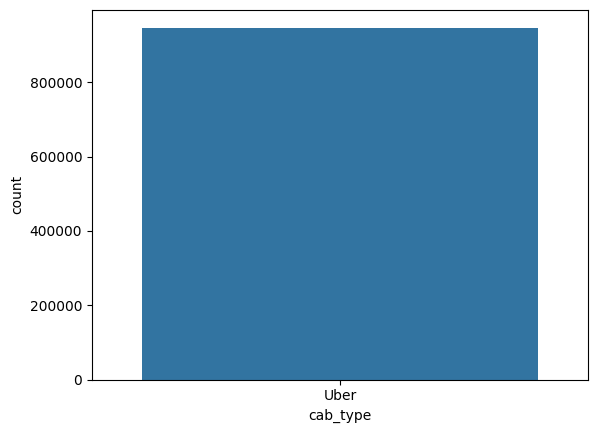

In [55]:
ax=sns.countplot(data=UberWeather, x='cab_type')

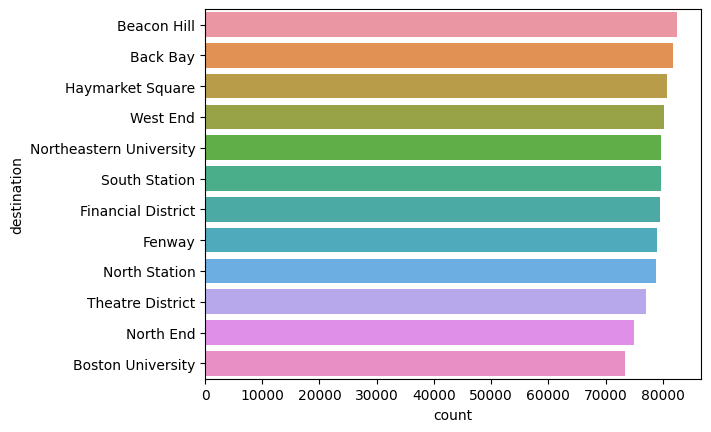

In [56]:
ax = sns.countplot(data=UberWeather, y='destination',order = UberWeather.destination.value_counts().index)  

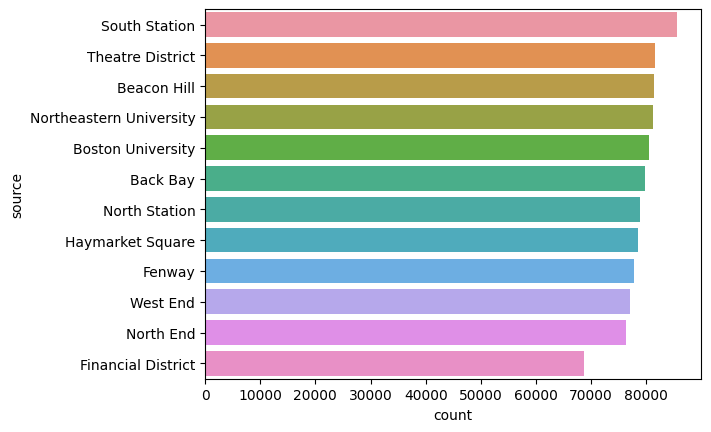

In [57]:
ax = sns.countplot(data=UberWeather, y='source', order = UberWeather.source.value_counts().index)

<Figure size 700x700 with 0 Axes>

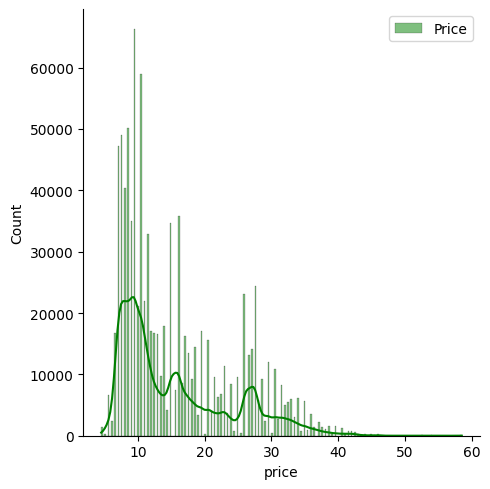

In [58]:
fig = plt.figure(figsize=(7,7))
sns.displot(UberWeather.price, color='green',label='Price', kde=True)
plt.legend();

<Figure size 700x700 with 0 Axes>

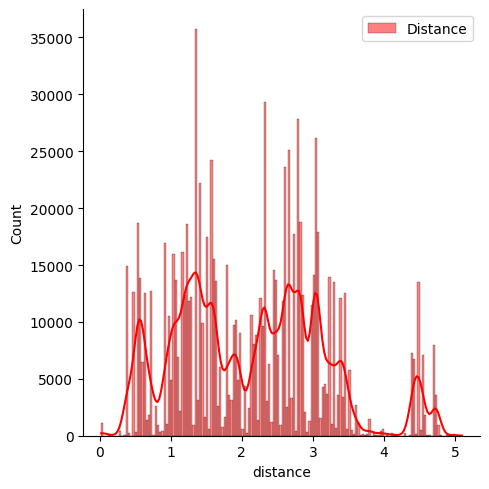

In [59]:
fig = plt.figure(figsize=(7,7))
sns.displot(UberWeather.distance, color='red',label='Distance', kde=True)
plt.legend();

<Figure size 700x700 with 0 Axes>

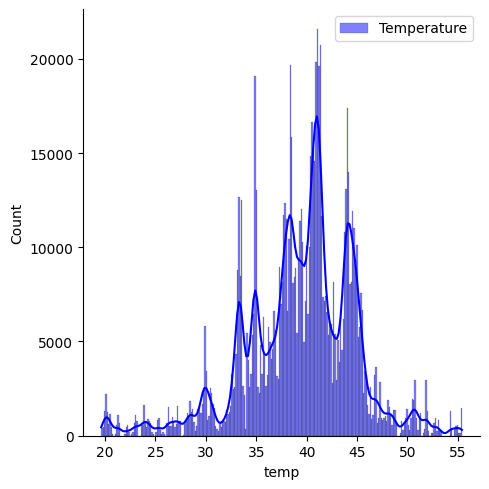

In [60]:
fig = plt.figure(figsize=(7,7))
sns.displot(UberWeather.temp, color='blue',label='Temperature', kde=True)
plt.legend();

<Figure size 700x700 with 0 Axes>

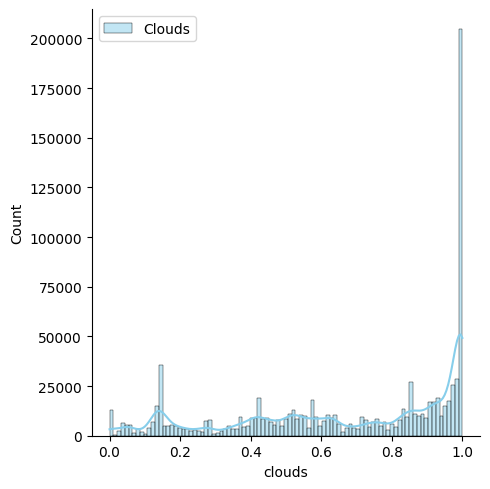

In [61]:
fig = plt.figure(figsize=(7,7))
sns.displot(UberWeather.clouds, color='Skyblue',label='Clouds', kde=True)
plt.legend();

<Figure size 700x700 with 0 Axes>

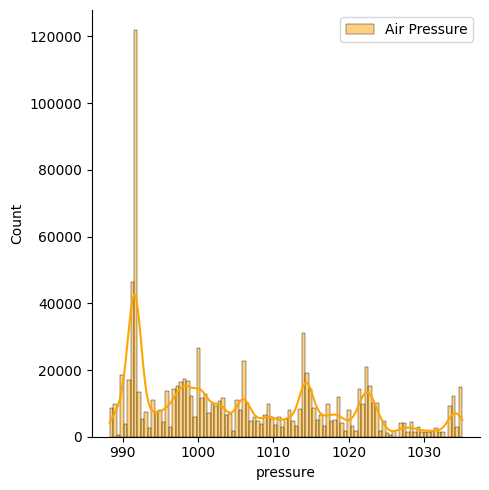

In [62]:
fig = plt.figure(figsize=(7,7))
sns.displot(UberWeather.pressure, color='orange',label='Air Pressure', kde=True)
plt.legend();

<Figure size 700x700 with 0 Axes>

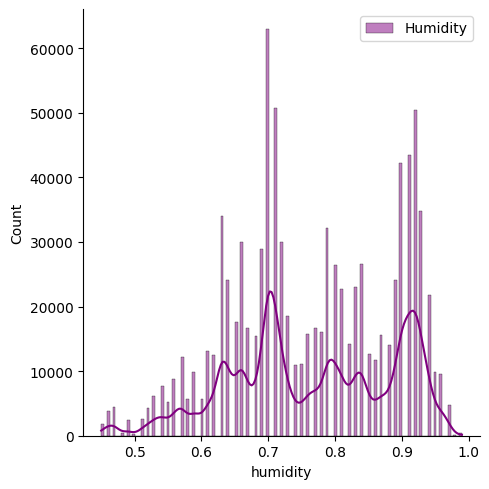

In [63]:
fig = plt.figure(figsize=(7,7))
sns.displot(UberWeather.humidity, color='purple',label='Humidity', kde=True)
plt.legend();

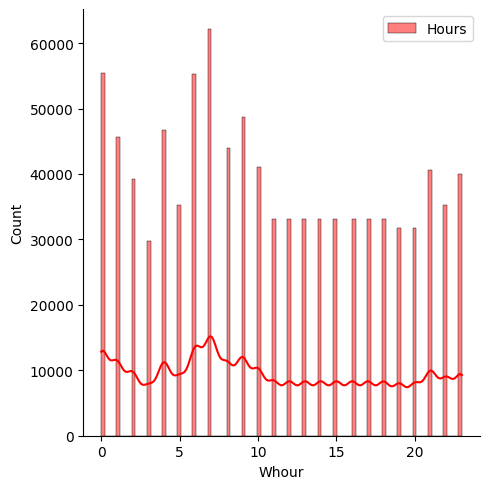

In [64]:
sns.displot(UberWeather.Whour, color='red',label='Hours', kde=True)
plt.legend();

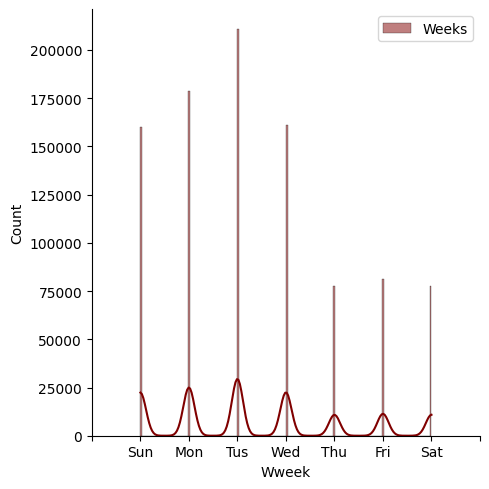

In [65]:
s = sns.displot(UberWeather.Wweek, color='maroon',label='Weeks', kde=True) 
s.set_xticklabels(['','Sun','Mon','Tus','Wed','Thu','Fri','Sat',''])
plt.legend();

<Axes: xlabel='Whour', ylabel='price'>

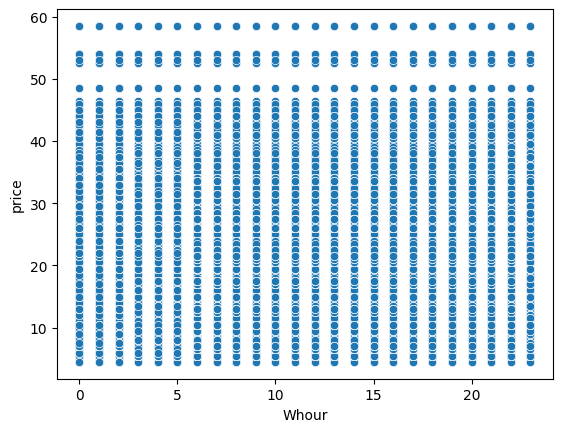

In [66]:
sns.scatterplot(data=UberWeather, x="Whour", y="price")

<Axes: xlabel='Wweek', ylabel='price'>

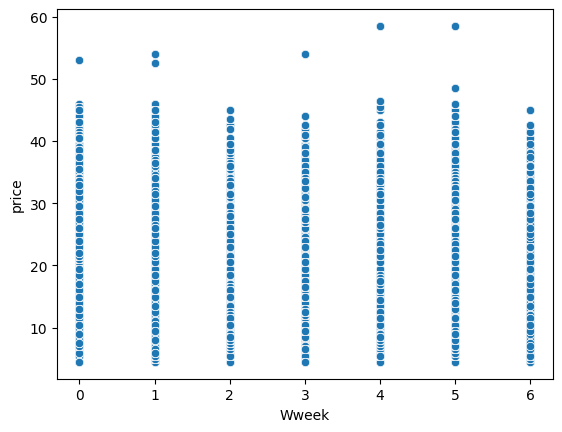

In [67]:
sns.scatterplot(data=UberWeather, x="Wweek", y="price")

<Axes: xlabel='distance', ylabel='price'>

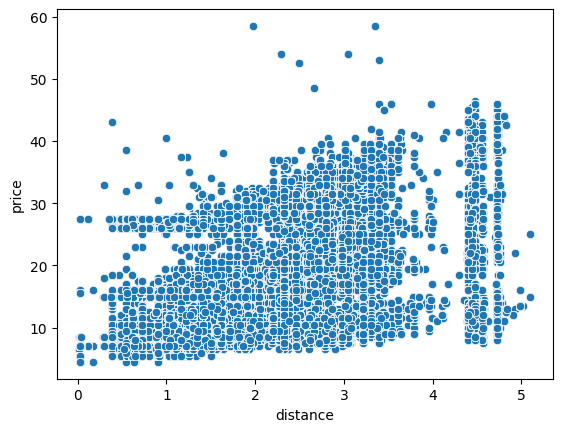

In [68]:
sns.scatterplot(data=UberWeather, x="distance", y="price")

<Axes: xlabel='temp', ylabel='price'>

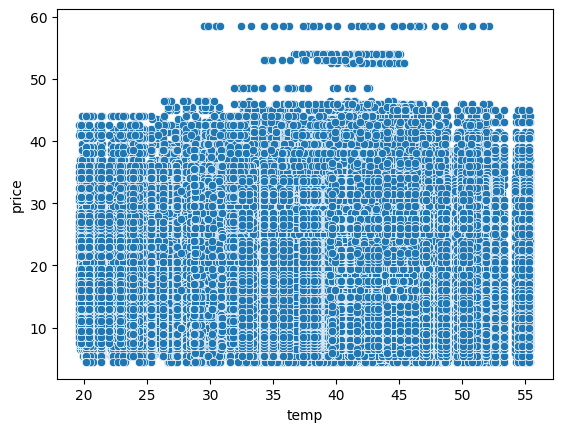

In [69]:
sns.scatterplot(data=UberWeather, x="temp", y="price")

<Axes: xlabel='clouds', ylabel='price'>

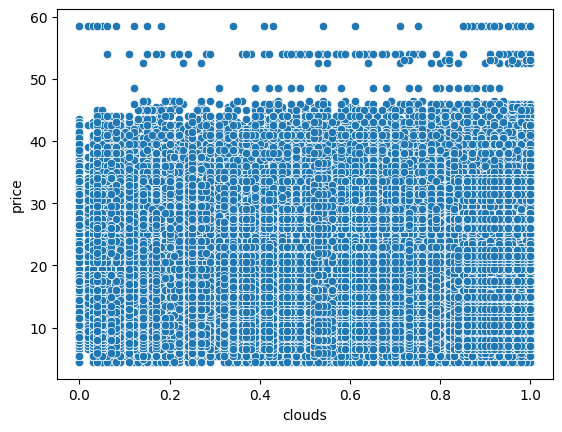

In [70]:
sns.scatterplot(data=UberWeather, x="clouds", y="price")

<Axes: xlabel='pressure', ylabel='price'>

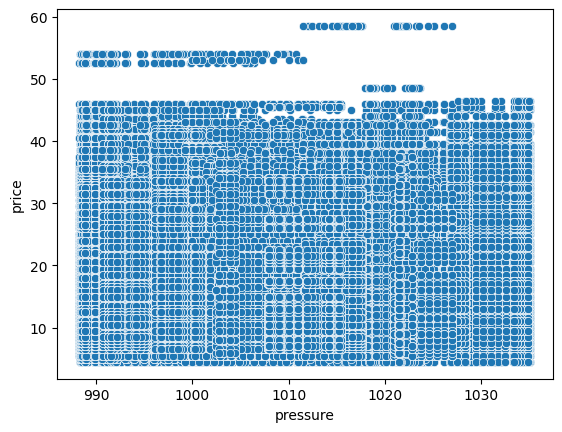

In [71]:
sns.scatterplot(data=UberWeather, x="pressure", y="price")

<Axes: xlabel='humidity', ylabel='price'>

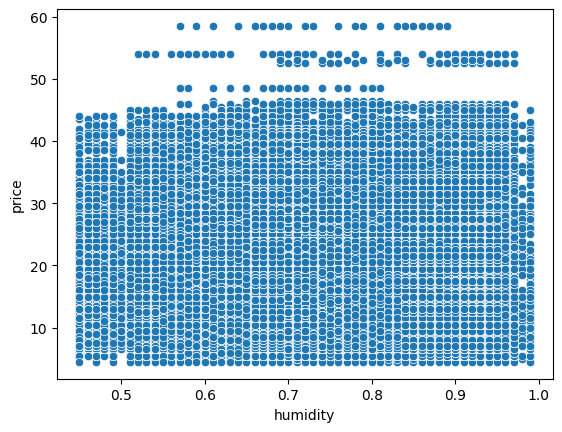

In [72]:
sns.scatterplot(data=UberWeather, x="humidity", y="price")

<Axes: xlabel='wind', ylabel='price'>

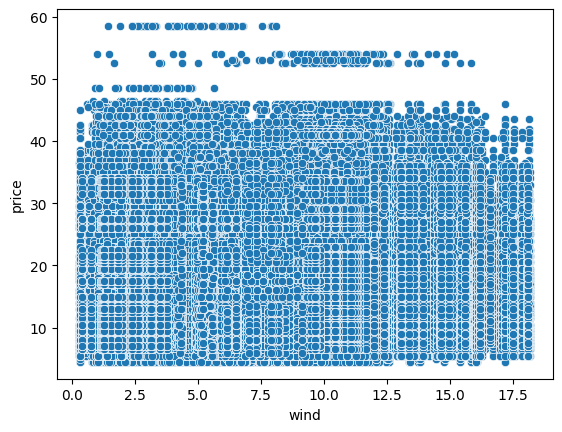

In [73]:
sns.scatterplot(data=UberWeather, x="wind", y="price")

<Axes: xlabel='rain', ylabel='price'>

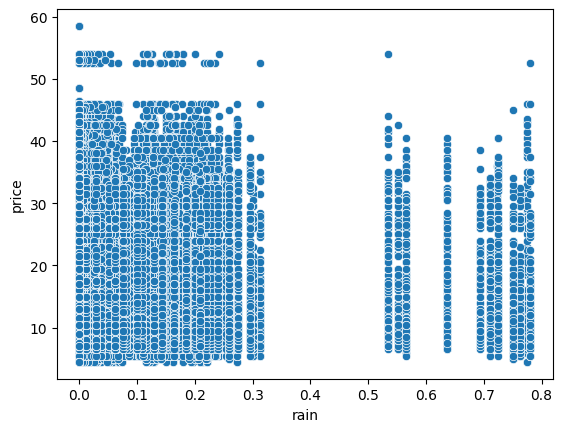

In [74]:
sns.scatterplot(data=UberWeather, x="rain", y="price")

In [75]:
desc = UberWeather.describe()
desc

,distance,time_stamp_x,price,surge_multiplier,temp,clouds,pressure,rain,time_stamp_y,humidity,wind,Wweek,Whour
count,947191.000000,9.471910e+05,947191.000000,947191.0,947191.000000,947191.000000,947191.000000,947191.000000,9.471910e+05,947191.000000,947191.000000,947191.000000,947191.000000
mean,2.118623,1.543772e+12,15.671595,1.0,39.337716,0.676881,1005.501678,0.010998,1.543767e+09,0.766078,7.296942,2.392767,10.736146
std,1.036424,6.203895e+08,8.379424,0.0,5.543657,0.312145,12.969570,0.051264,6.240741e+05,0.121075,3.517852,1.814939,6.982390
min,0.020000,1.543204e+12,4.500000,1.0,19.620000,0.000000,988.250000,0.000000,1.543204e+09,0.450000,0.290000,0.000000,0.000000
25%,1.300000,1.543364e+12,9.000000,1.0,36.350000,0.440000,992.140000,0.000000,1.543364e+09,0.680000,4.220000,1.000000,5.000000
50%,2.140000,1.543459e+12,12.500000,1.0,40.050000,0.770000,1002.450000,0.000000,1.543456e+09,0.760000,7.430000,2.000000,10.000000
75%,2.840000,1.543817e+12,21.000000,1.0,42.960000,0.970000,1015.050000,0.000000,1.543820e+09,0.890000,10.060000,3.000000,17.000000
max,5.100000,1.545161e+12,58.500000,1.0,55.410000,1.000000,1035.120000,0.780700,1.545159e+09,0.990000,18.180000,6.000000,23.000000


In [76]:
UberWeather

,distance,cab_type,time_stamp_x,destination,source,price,surge_multiplier,id,product_id,name,...,clouds,pressure,rain,time_stamp_y,humidity,wind,date_time,Wdate,Wweek,Whour
0,0.55,Uber,1543896180749,South Station,Theatre District,27.5,1.0,e0369d75-66a0-4b92-8cb6-877c0fe831b7,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,0.04,1003.20,0.0,1543888374,0.60,7.75,2018-12-04 01:52:54,2018-12-04,1,1
1,0.55,Uber,1543896180749,South Station,Theatre District,27.5,1.0,e0369d75-66a0-4b92-8cb6-877c0fe831b7,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,0.25,1003.17,0.0,1543891974,0.62,8.44,2018-12-04 02:52:54,2018-12-04,1,2
2,0.55,Uber,1543896180749,South Station,Theatre District,27.5,1.0,e0369d75-66a0-4b92-8cb6-877c0fe831b7,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,0.56,1004.45,0.0,1543902774,0.64,8.21,2018-12-04 05:52:54,2018-12-04,1,5
3,0.55,Uber,1543896180749,South Station,Theatre District,27.5,1.0,e0369d75-66a0-4b92-8cb6-877c0fe831b7,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,0.53,1003.15,0.0,1543895574,0.62,7.36,2018-12-04 03:52:54,2018-12-04,1,3
4,0.55,Uber,1543896180749,South Station,Theatre District,27.5,1.0,e0369d75-66a0-4b92-8cb6-877c0fe831b7,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,0.52,1003.93,0.0,1543899174,0.63,8.05,2018-12-04 04:52:54,2018-12-04,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966152,3.22,Uber,1544399592411,North Station,Northeastern University,36.0,1.0,96f05779-4dc6-49db-b265-f5ab77257bf1,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,0.19,1022.80,0.0,1544396784,0.56,5.56,2018-12-09 23:06:24,2018-12-09,6,23
966155,2.62,Uber,1544397207574,Boston University,Theatre District,21.5,1.0,653c159a-de4b-4e1a-b616-8b990801abad,6c84fd89-3f11-4782-9b50-97c468b19529,Black,...,0.21,1022.81,0.0,1544396903,0.57,5.44,2018-12-09 23:08:23,2018-12-09,6,23
966156,2.62,Uber,1544397207574,Boston University,Theatre District,21.5,1.0,653c159a-de4b-4e1a-b616-8b990801abad,6c84fd89-3f11-4782-9b50-97c468b19529,Black,...,0.21,1022.82,0.0,1544396784,0.56,5.42,2018-12-09 23:06:24,2018-12-09,6,23
966157,1.39,Uber,1544399605107,Boston University,Back Bay,15.0,1.0,548cba6c-8f76-4eb8-8e4a-4a26e128f5ed,6c84fd89-3f11-4782-9b50-97c468b19529,Black,...,0.21,1022.81,0.0,1544396903,0.57,5.44,2018-12-09 23:08:23,2018-12-09,6,23


In [77]:
UberWeather['surge_multiplier'].value_counts()

1.0    947191
Name: surge_multiplier, dtype: int64

In [78]:
df1 = pd.DataFrame(index=['distance', 'price',
                          'temp', 'clouds', 'pressure', 'humidity', 'wind', 
                           'Wweek', 'Whour'], 
                   columns= ["count","mean","std","min",
                             "25%","50%","75%","max"], data= desc )

In [79]:
import warnings
warnings.filterwarnings("ignore")  #### Hides warning messages to get cleaner outputs.
sns.set_theme(style = 'whitegrid')

# figure size in inches for Seaborn
sns.set(rc={'figure.figsize':(11.7,8.27)})

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

### Feature Engineering

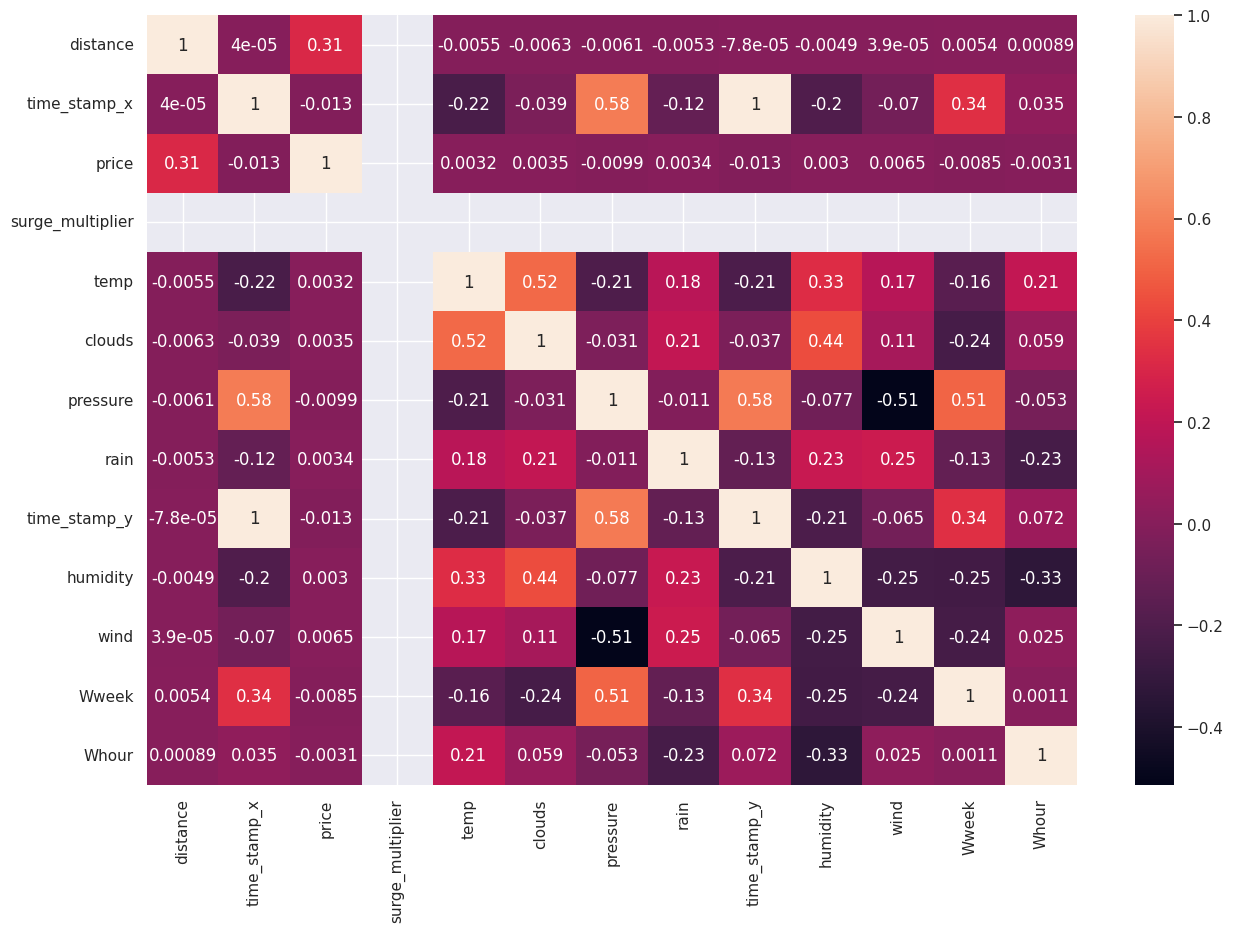

In [81]:
plt.figure(figsize=(15,10))
sns.heatmap(UberWeather.corr(),annot=True)
plt.show()

In [82]:
UberWeather.columns 

Index(['distance', 'cab_type', 'time_stamp_x', 'destination', 'source',
       'price', 'surge_multiplier', 'id', 'product_id', 'name', 'datetime',
       'Udate', 'temp', 'location', 'clouds', 'pressure', 'rain',
       'time_stamp_y', 'humidity', 'wind', 'date_time', 'Wdate', 'Wweek',
       'Whour'],
      dtype='object')

In [83]:
### Here we remove unwanted columns for modeling. We remove columns which have all values repeited and columns which have all distinct values.
UberMod = UberWeather.drop(['cab_type','time_stamp_x','id','product_id','datetime','Udate','time_stamp_y','date_time','surge_multiplier'], axis=1)     

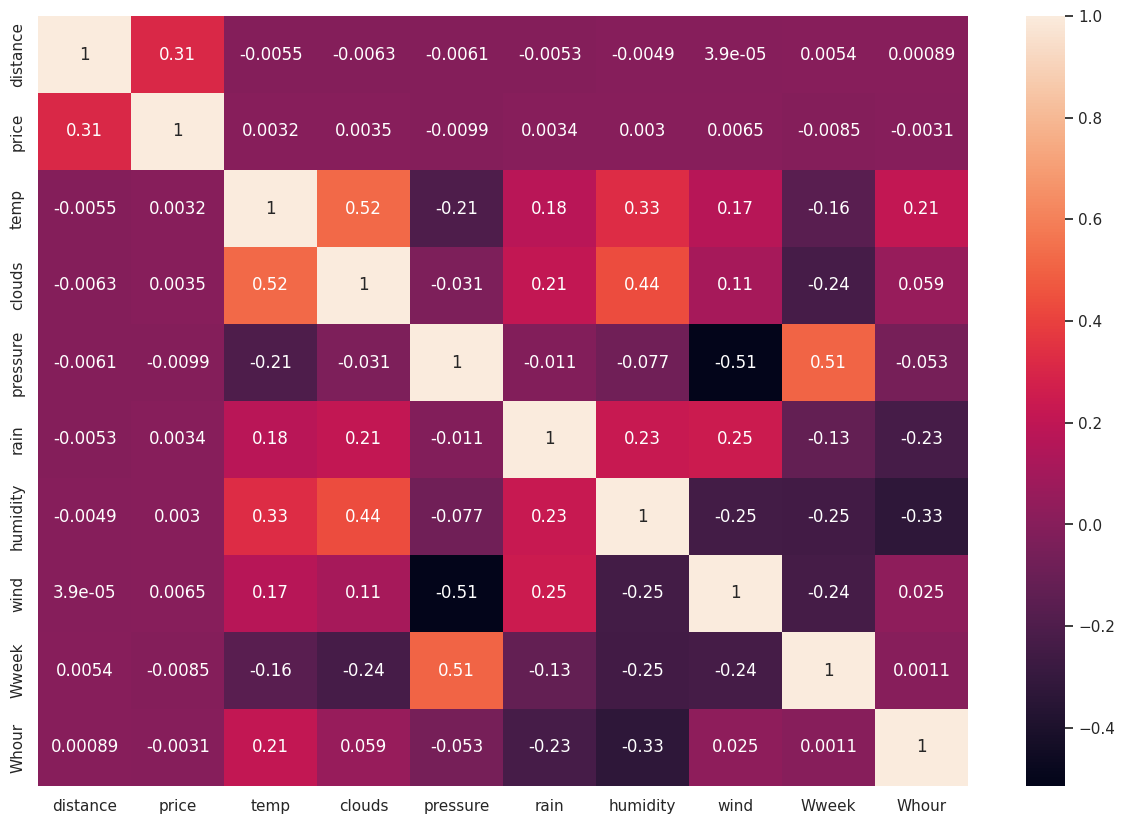

In [84]:
plt.figure(figsize=(15,10))
sns.heatmap(UberMod.corr(),annot=True)
plt.show()

In [85]:
UberMod.columns

Index(['distance', 'destination', 'source', 'price', 'name', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind', 'Wdate',
       'Wweek', 'Whour'],
      dtype='object')

In [86]:
### Ussed for encoding and feature engineering. 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [87]:
## Here we encode data by remapping it to numeric values so its easier for the model to process and be more efficient.
le = LabelEncoder()
classes_and_values ={}
UberMod.source = le.fit_transform(UberMod.source)
classes= le.classes_
assigned_values =le.transform(classes)

    # Store the classes and their assigned values in the dictionary
classes_and_values['source']=dict(zip(classes, assigned_values))

UberMod.destination = le.fit_transform(UberMod.destination)
classes_1 = le.classes_
assigned_values_1=le.transform(classes_1)

    # Store the classes and their assigned values in the dictionary
classes_and_values['destination']=dict(zip(classes_1, assigned_values_1))

UberMod.name = le.fit_transform(UberMod.name)
classes_2= le.classes_
assigned_values_2=le.transform(classes_2)

    # Store the classes and their assigned values in the dictionary
classes_and_values['name']=dict(zip(classes_2, assigned_values_2))

UberMod.Wdate = le.fit_transform(UberMod.Wdate)
classes_3= le.classes_
assigned_values_3=le.transform(classes_3)

    # Store the classes and their assigned values in the dictionary
classes_and_values['Wdate']=dict(zip(classes_3, assigned_values_3))

UberMod.location = le.fit_transform(UberMod.location)
classes_4= le.classes_
assigned_values_4=le.transform(classes_4)

    # Store the classes and their assigned values in the dictionary
classes_and_values['location']=dict(zip(classes_4, assigned_values_4))
classes_and_values

{'source': {'Back Bay': 0,
  'Beacon Hill': 1,
  'Boston University': 2,
  'Fenway': 3,
  'Financial District': 4,
  'Haymarket Square': 5,
  'North End': 6,
  'North Station': 7,
  'Northeastern University': 8,
  'South Station': 9,
  'Theatre District': 10,
  'West End': 11},
 'destination': {'Back Bay': 0,
  'Beacon Hill': 1,
  'Boston University': 2,
  'Fenway': 3,
  'Financial District': 4,
  'Haymarket Square': 5,
  'North End': 6,
  'North Station': 7,
  'Northeastern University': 8,
  'South Station': 9,
  'Theatre District': 10,
  'West End': 11},
 'name': {'Black': 0,
  'Black SUV': 1,
  'UberPool': 2,
  'UberX': 3,
  'UberXL': 4,
  'WAV': 5},
 'Wdate': {datetime.date(2018, 11, 26): 0,
  datetime.date(2018, 11, 27): 1,
  datetime.date(2018, 11, 28): 2,
  datetime.date(2018, 11, 29): 3,
  datetime.date(2018, 11, 30): 4,
  datetime.date(2018, 12, 1): 5,
  datetime.date(2018, 12, 2): 6,
  datetime.date(2018, 12, 3): 7,
  datetime.date(2018, 12, 4): 8,
  datetime.date(2018, 12, 9

In [88]:
UberMod["Whour"].unique()

array([ 1,  2,  5,  3,  4,  0,  9, 10, 22, 23,  7, 14, 19,  8, 13, 16, 20,
       12, 11, 21, 18, 15,  6, 17])

In [89]:
UberMod.drop(["Wdate", "clouds"],axis=1)

,distance,destination,source,price,name,temp,location,pressure,rain,humidity,wind,Wweek,Whour
0,0.55,9,10,27.5,1,45.89,9,1003.20,0.0,0.60,7.75,1,1
1,0.55,9,10,27.5,1,45.07,9,1003.17,0.0,0.62,8.44,1,2
2,0.55,9,10,27.5,1,39.87,9,1004.45,0.0,0.64,8.21,1,5
3,0.55,9,10,27.5,1,44.03,9,1003.15,0.0,0.62,7.36,1,3
4,0.55,9,10,27.5,1,41.85,9,1003.93,0.0,0.63,8.05,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
966152,3.22,7,8,36.0,1,30.92,7,1022.80,0.0,0.56,5.56,6,23
966155,2.62,2,10,21.5,0,30.86,2,1022.81,0.0,0.57,5.44,6,23
966156,2.62,2,10,21.5,0,30.89,2,1022.82,0.0,0.56,5.42,6,23
966157,1.39,2,0,15.0,0,30.86,2,1022.81,0.0,0.57,5.44,6,23


In [90]:
UberMod_1=UberMod[['destination','source','distance']]

In [91]:
UberMod_1

,destination,source,distance
0,9,10,0.55
1,9,10,0.55
2,9,10,0.55
3,9,10,0.55
4,9,10,0.55
...,...,...,...
966152,7,8,3.22
966155,2,10,2.62
966156,2,10,2.62
966157,2,0,1.39


# Model Building

In [92]:
X = UberMod.drop('price',axis=1)
Y = UberMod['price']
X1=UberMod_1.drop('distance',axis=1)
Y1= UberMod_1['distance']

In [93]:
print(Y1)

0         0.55
1         0.55
2         0.55
3         0.55
4         0.55
          ... 
966152    3.22
966155    2.62
966156    2.62
966157    1.39
966158    1.39
Name: distance, Length: 947191, dtype: float64


# Required for modeling


In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression, ElasticNet

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBClassifier

## For model selection and cross validation.
from sklearn.metrics import accuracy_score,confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score,r2_score, recall_score,f1_score,classification_report,roc_curve,auc,average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn import metrics

### Ussed for encoding and feature engineering. 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LinearRegression

### Once separation is done we split the data for training and testing. We used the traditional ratio 70:30 for our train and test respectively.

In [95]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state=12345)

In [96]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,Y1,test_size = 0.3,random_state=12345)

In [97]:
print('DataFrame Shape:', UberMod.shape)
print('*'*25)
print('X Train Shape:', X_train.shape)
print('*'*25)
print('X Test Shape:', X_test.shape)
print('*'*25)
print('Y Train Shape:', y_train.shape)
print('*'*25)
print('Y Test Shape:', y_test.shape)     

DataFrame Shape: (947191, 15)
*************************
X Train Shape: (663033, 14)
*************************
X Test Shape: (284158, 14)
*************************
Y Train Shape: (663033,)
*************************
Y Test Shape: (284158,)


In [98]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [99]:

pred=model.predict(X_test)
r2= r2_score(y_test,pred)
print("R2 score:", r2)

R2 score: 0.4106650592622051


In [100]:
data=pd.DataFrame({'Actual Data': y_test, 'Prediction Data': pred})

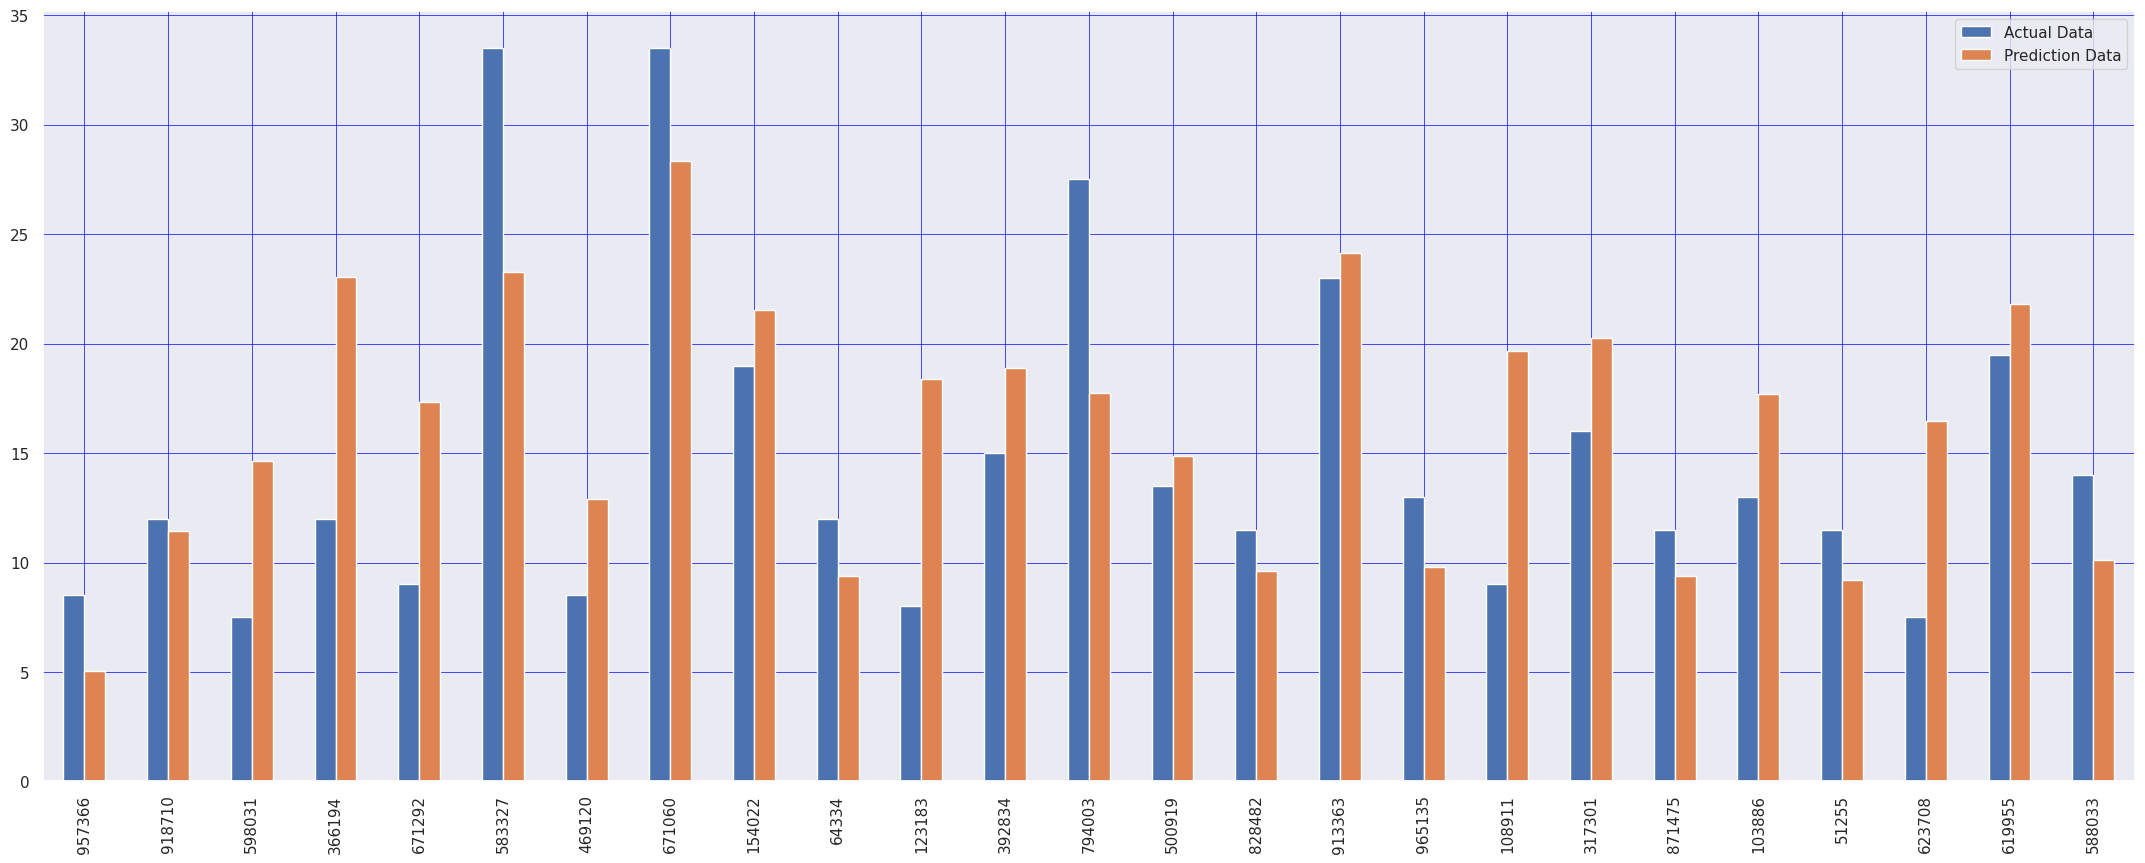

In [101]:
data1=data.head(25)
data1.plot(kind='bar',figsize=(27,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='blue')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

# Linear Regression

In [102]:
# instantiate the model
reg = LinearRegression()

# call cross_val_score
cv_results = cross_val_score(reg, X_train, y_train, cv=5)

print(f'Scores: {np.round(cv_results, 3)}')
print(f'Scores mean: {np.round(np.mean(cv_results), 3)}')

Scores: [0.41  0.41  0.408 0.412 0.41 ]
Scores mean: 0.41


# Decision Tree

In [106]:
dt_models = DecisionTreeRegressor()
dt_models.fit(X_train, y_train)
dt_pred = dt_models.predict(X_test)
r2 = r2_score(y_test, dt_pred)
print("r2 Score", r2)

r2 Score 0.9511768438820642


# Random Forest

In [108]:
from sklearn.ensemble import RandomForestRegressor


# Create a Random Forest classifier
RF_model = RandomForestRegressor()

# Train the model
RF_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = RF_model.predict(X_test)

# Evaluate the accuracy of the model
r2 = r2_score(y_test, y_pred)
print("r2 Score:", r2)

r2 Score: 0.959226463605587


# XGBoost

In [109]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

XGB_model = xgb.XGBRegressor()

# Train the model on the training data
XGB_model.fit(X_train, y_train)

# Make predictions on the testing data
predictions = XGB_model.predict(X_test)

# Calculate the mean squared error for evaluation
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("r2 Score:", r2)

Mean Squared Error: 2.5667081233501534
r2 Score: 0.959226463605587


In [111]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

XGB_model_distance= xgb.XGBRegressor()

# Train the model on the training data
XGB_model_distance.fit(X1_train, y1_train)
y1_pred = XGB_model_distance.predict(X1_test)

# Make predictions on the testing data
predictions = XGB_model_distance.predict(X1_test)

# Calculate the mean squared error for evaluation
mse = mean_squared_error(y1_test, predictions)
print("Mean Squared Error:", mse)
r2 = r2_score(y1_test, y1_pred)
print("r2 Score:", r2)

Mean Squared Error: 0.07589222574515171
r2 Score: 0.9290245191107378


In [112]:
import pickle
with open('XGB_model_distance.pkl','wb') as file:
    pickle.dump(XGB_model_distance,file)

In [113]:
import pickle
with open('XGB_model.pkl','wb') as file:
    pickle.dump(XGB_model,file)

In [114]:
import pickle

with open('encoded_value.pkl','wb') as file:
    pickle.dump(classes_and_values,file)

In [115]:
UberMod.to_csv('final_uber.csv')